In [76]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [77]:
df=pd.read_csv('covid19_tweets.csv')

In [78]:
df.shape

(179108, 13)

In [79]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
user_name           179108 non-null object
user_location       142337 non-null object
user_description    168822 non-null object
user_created        179108 non-null object
user_followers      179108 non-null int64
user_friends        179108 non-null int64
user_favourites     179108 non-null int64
user_verified       179108 non-null bool
date                179108 non-null object
text                179108 non-null object
hashtags            127774 non-null object
source              179031 non-null object
is_retweet          179108 non-null bool
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [81]:
df.isnull().sum()

user_name               0
user_location       36771
user_description    10286
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
source                 77
is_retweet              0
dtype: int64

In [82]:
df.isnull().sum()/len(df)

user_name           0.000000
user_location       0.205301
user_description    0.057429
user_created        0.000000
user_followers      0.000000
user_friends        0.000000
user_favourites     0.000000
user_verified       0.000000
date                0.000000
text                0.000000
hashtags            0.286609
source              0.000430
is_retweet          0.000000
dtype: float64

#### User_location has 20% null values and hashtags have 28% null values. I am not removing them for now as we are not predicting anything and this won't affect the modeling pattern.

### Verified Accounts versus Unverified Accounts

In [83]:
df['user_verified'].value_counts()

False    156013
True      23095
Name: user_verified, dtype: int64

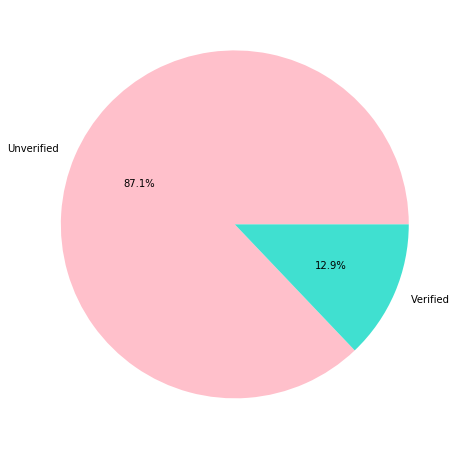

In [145]:
plt.figure(figsize=(10,8))
plt.pie(df['user_verified'].value_counts(), autopct='%1.1f%%', colors=['pink','turquoise'], labels=['Unverified','Verified'])
plt.show()

#### Here we can see that majority of tweets are from unverified accounts, which makes sense sinse verified accounts are fewer in number than unverified accounts.

In [85]:
df['is_retweet'].value_counts() #None of the tweets are retweets

False    179108
Name: is_retweet, dtype: int64

#### When we see if the tweet is a retweet or not, all the records have 'False' as their response.

### Analysing most frequent Usernames

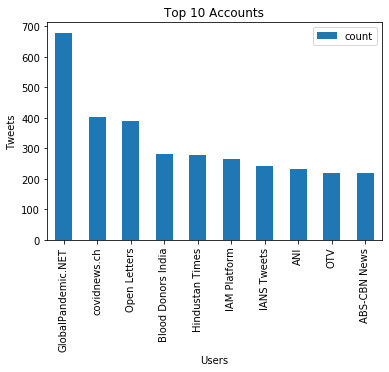

In [86]:
top_users=df.groupby('user_name')['user_location'].count().reset_index()
top_users.columns=['user_name','count']
top_users.sort_values('count',ascending=False,inplace=True)
top_users[0:10].plot(kind='bar',x='user_name',y='count')
plt.xlabel('Users')
plt.ylabel('Tweets')
plt.title('Top 10 Accounts')
plt.show()

### Analysing the frequency of Tweets Datewise

In [87]:
col_one_list = df['date'].tolist()
col_one_list


lst=[]
for i in col_one_list:
    lst.append(str(i).split(' ')[0]) #since we dont need the timestamp

In [88]:
df['Dates'] = lst

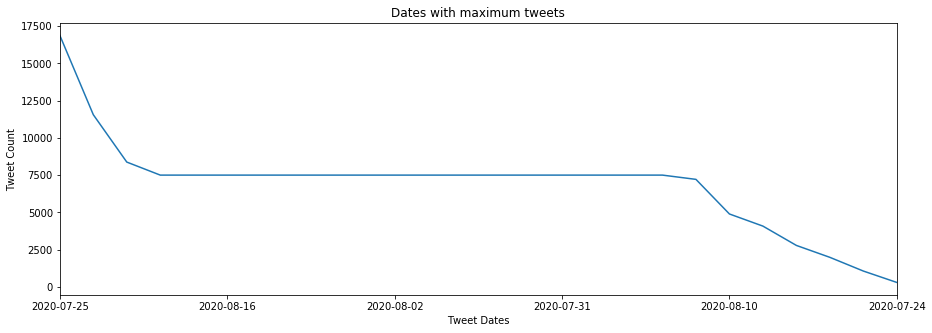

In [89]:
plt.figure(figsize=(15,5))

df['Dates'].value_counts().plot.line()
plt.title('Dates with maximum tweets')
plt.xlabel('Tweet Dates')
plt.ylabel('Tweet Count')
plt.show()

#### 25th July was the date that had the most number of tweets.

In [90]:
July25=df['user_location'][df['Dates']=='2020-07-25'].value_counts() #the date with highest tweets

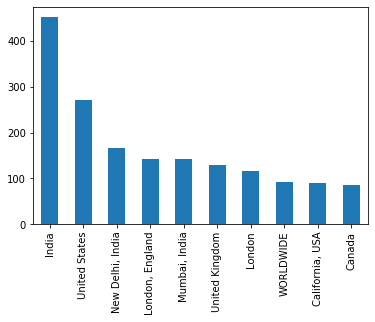

In [91]:
July25[0:10].plot(kind='bar')
plt.show() 

#### These locations had a surge of cases on or just before this day.

### Analysing Tweets Monthly and Locationwise

In [92]:
pd.DatetimeIndex(df['date']).month.unique()

Int64Index([7, 8], dtype='int64', name='date')

In [93]:
July=df['user_location'][pd.DatetimeIndex(df['date']).month==7].value_counts()

In [94]:
August=df['user_location'][pd.DatetimeIndex(df['date']).month==8].value_counts()

In [95]:
Total=(July+August).sort_values(ascending=False)

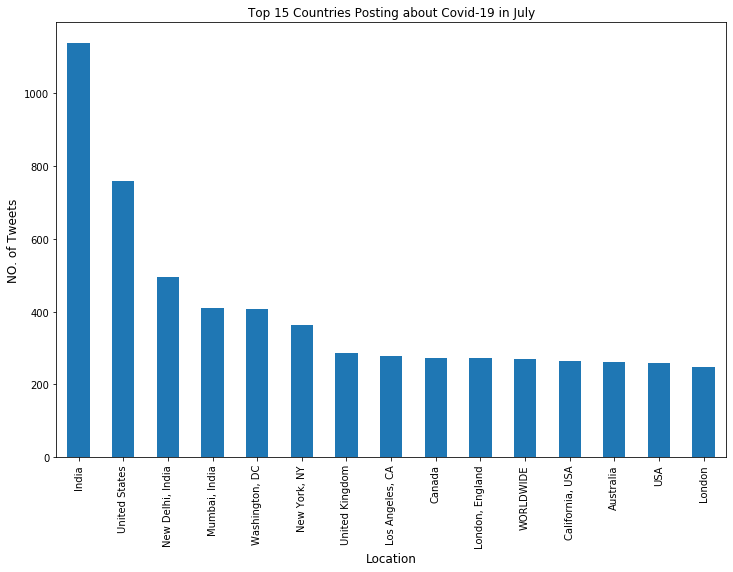

In [96]:
fig, ax = plt.subplots(figsize = (12,8))
plt.xlabel("Location", fontsize = 12)
plt.ylabel("NO. of Tweets", fontsize = 12)
July[0:15].plot(kind='bar', title = "Top 15 Countries Posting about Covid-19 in July", )
plt.show()

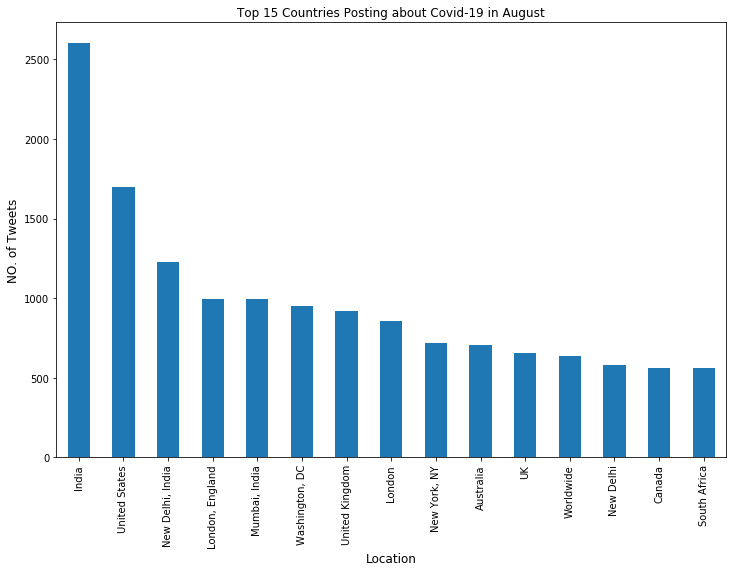

In [97]:
fig, ax = plt.subplots(figsize = (12,8))
plt.xlabel("Location", fontsize = 12)
plt.ylabel("NO. of Tweets", fontsize = 12)
August[0:15].plot(kind='bar', title = "Top 15 Countries Posting about Covid-19 in August", )
plt.show()

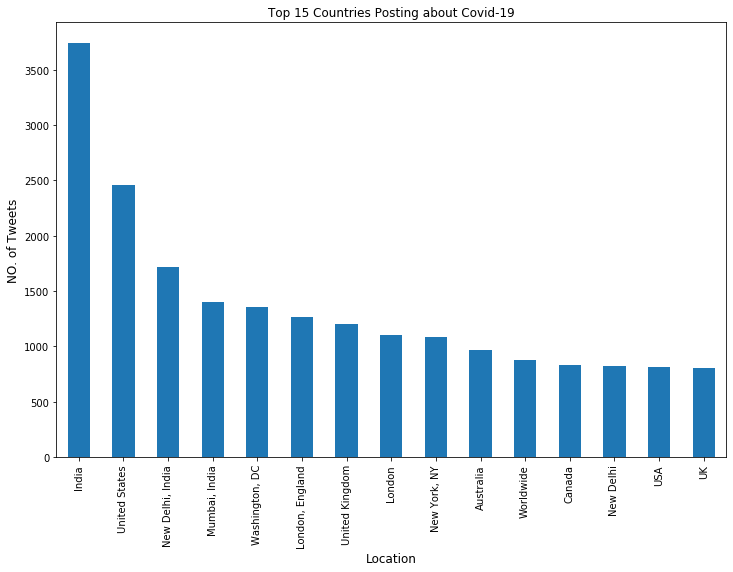

In [98]:
fig, ax = plt.subplots(figsize = (12,8))
plt.xlabel("Location", fontsize = 12)
plt.ylabel("NO. of Tweets", fontsize = 12)
Total[0:15].plot(kind='bar', title = "Top 15 Countries Posting about Covid-19", )
plt.show()

### Analysing the source of the tweets

In [99]:
df['source'].value_counts()

Twitter Web App                 56891
Twitter for Android             40179
Twitter for iPhone              35472
TweetDeck                        8543
Hootsuite Inc.                   7321
Twitter for iPad                 4336
Buffer                           2728
Sprout Social                    1833
Instagram                        1759
IFTTT                            1545
dlvr.it                           681
GlobalPandemic.NET                679
LinkedIn                          628
COVID19-Updates                   625
Twitter Media Studio              596
WordPress.com                     537
HubSpot                           513
Sprinklr                          497
FS Poster                         414
Dynamic Signal                    391
Resistbot Open Letters            390
Cheap Bots, Done Quick!           335
Paper.li                          322
Twitter for Advertisers           317
Blood Donors India                281
IAMBLOG2TWITTER                   266
Alexander Hi

In [100]:
df['source'].value_counts()[df['source'].value_counts()>700]

Twitter Web App        56891
Twitter for Android    40179
Twitter for iPhone     35472
TweetDeck               8543
Hootsuite Inc.          7321
Twitter for iPad        4336
Buffer                  2728
Sprout Social           1833
Instagram               1759
IFTTT                   1545
Name: source, dtype: int64

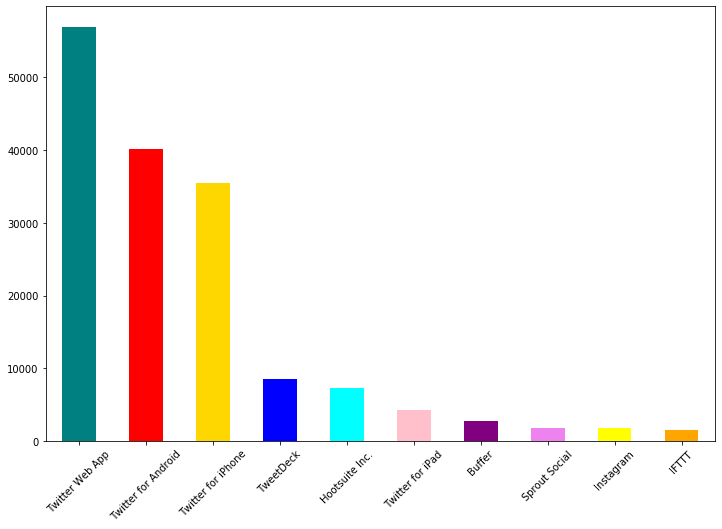

In [101]:
plt.figure(figsize=(12,8))
df['source'].value_counts()[df['source'].value_counts()>700].plot(kind='bar', color=['teal', 'red', 'gold', 'blue', 'cyan','pink','purple','violet','yellow','orange'])
plt.xticks(rotation=45)
plt.show()

### Analysing platforms countrywise

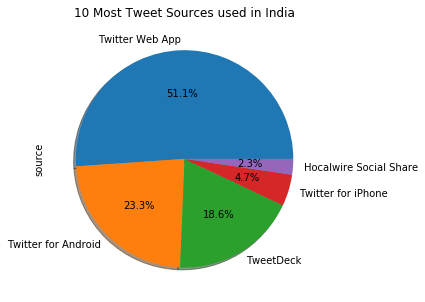

In [102]:
platform = df['source'][df['user_location'] == 'India'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(5,5))
platform[0:5].plot(kind = 'pie', title = '10 Most Tweet Sources used in India', autopct='%1.1f%%',shadow=True)
plt.show()

#### In India the most used platform is twitter web app followed by Twitter for Android.

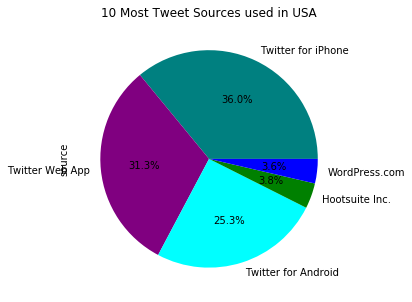

In [103]:
platformsU = df['source'][df['user_location'] == 'United States'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(5,5))
color = ['teal','purple','cyan','green','blue']
platformsU[0:5].plot(kind = 'pie', title = '10 Most Tweet Sources used in USA', autopct='%1.1f%%',colors = color)
plt.show()

#### Conversely, in the US the most used platform is iPhone, followed by Twitter Web App and the Android.

### Analysing most used hashtags

In [104]:
[df['hashtags'].value_counts().head(10)]

[['COVID19']                                                               37792
 ['Covid19']                                                                4834
 ['covid19']                                                                3124
 ['coronavirus', 'CoronaVirusUpdate', 'COVID19', 'CoronavirusPandemic']      624
 ['coronavirus']                                                             550
 ['COVID19', 'coronavirus']                                                  519
 ['Coronavirus', 'COVID19']                                                  503
 ['coronavirus', 'COVID19']                                                  491
 ['CoronaVirusUpdates', 'COVID19']                                           319
 ['Coronavirus']                                                             262
 Name: hashtags, dtype: int64]

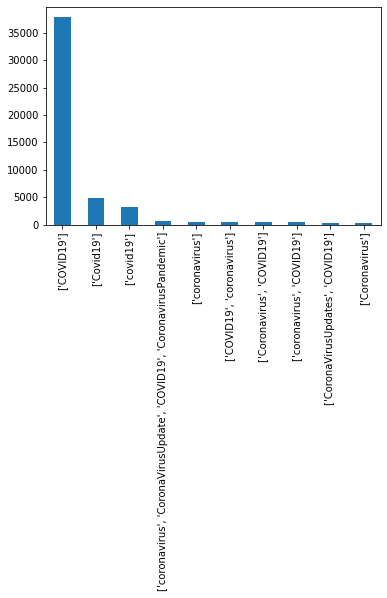

In [105]:
df['hashtags'].value_counts()[df['hashtags'].value_counts()>250].plot(kind='bar')
plt.show()

#### These are the top 10 most used hashtags.

### Sentiment Analysis

In [106]:
from nltk.stem import LancasterStemmer, SnowballStemmer, RegexpStemmer, WordNetLemmatizer 
import nltk
#import sentence tokenizer
from nltk import sent_tokenize
#import word tokenizer
from nltk import word_tokenize
#list of stopwords
from nltk.corpus import stopwords
import string
#import geograpy
import emoji
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [107]:
tweets=pd.DataFrame(df['text'])

In [108]:
import re
def char_is_emoji(character):
    return character in emoji.UNICODE_EMOJI
#does the text contain an emoji?
def text_has_emoji(text):
    for character in text:
        if character in emoji.UNICODE_EMOJI:
            return True
    return False
#remove the emoji
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [109]:
punct =[]
punct += list(string.punctuation)
punct += '’'
punct.remove("'")
def remove_punctuations(text):
    for punctuation in punct:
        text = text.replace(punctuation, ' ')
    return text

In [110]:
def nlp(df):
    # lowercase everything
    # get rid of '\n' from whitespace
    # regex remove hyperlinks
    # removing '&gt;'
    # check for emojis
    # remov
        # lowercase everything
    df['token'] = df['text'].apply(lambda x: x.lower())
    # get rid of '\n' from whitespace 
    df['token'] = df['token'].apply(lambda x: x.replace('\n', ' '))
    # regex remove hyperlinks
    df['token'] = df['token'].str.replace('http\S+|www.\S+', '', case=False)
    # removing '&gt;'
    df['token'] = df['token'].apply(lambda x: x.replace('&gt;', ''))
    # Checking if emoji in tokens column, use for EDA purposes otherwise not necessary to keep this column
    df['emoji'] = df['token'].apply(lambda x: text_has_emoji(x))
    # Removing Emojis from tokens
    #df['token'] = df['token'].apply(lambda x: deEmojify(x))
    # remove punctuations
    #df['token'] = df['token'].apply(remove_punctuations)
    # remove ' s ' that was created after removing punctuations
    df['token'] = df['token'].apply(lambda x: str(x).replace(" s ", " "))
    return df

In [111]:
tweetsA=nlp(tweets)

In [112]:
def SentiAnlyser(df):
    analyser= SentimentIntensityAnalyzer()
    df['sentiment']=df['token'].apply(lambda x: analyser.polarity_scores(x))
    df['sentiment']=df['sentiment'].apply(lambda x:categoriser(x))
    return df

In [113]:
tweetsB=SentiAnlyser(tweetsA)

In [114]:
tweetsB.head()

,text,token,emoji,sentiment
0,If I smelled the scent of hand sanitizers toda...,if i smelled the scent of hand sanitizers toda...,False,Positive
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,hey @yankees @yankeespr and @mlb - wouldn't it...,False,Negative
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,@diane3443 @wdunlap @realdonaldtrump trump nev...,False,Negative
3,@brookbanktv The one gift #COVID19 has give me...,@brookbanktv the one gift #covid19 has give me...,False,Positive
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 july : media bulletin on novel #coronavirus...,False,Positive


In [115]:
tweetsB.to_csv('./sentiment.csv')

In [116]:
tweetsB.iloc[22]

text         @JimBnntt Your image doesn't list a source, bu...
token        @jimbnntt your image doesn't list a source, bu...
emoji                                                    False
sentiment                                             Negative
Name: 22, dtype: object

In [117]:
tweet_sentiments=pd.DataFrame(tweetsB['sentiment'].value_counts())
tweet_sentiments.reset_index(inplace=True)
tweet_sentiments.rename(columns={'index':'Sentiment','sentiment':'count'},inplace=True)

In [118]:
tweet_sentiments

,Sentiment,count
0,Neutral,62906
1,Negative,61095
2,Positive,55107


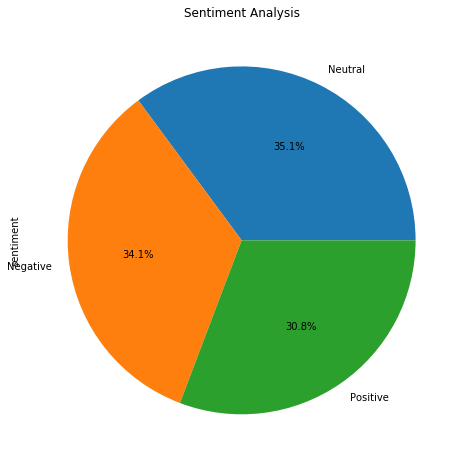

In [140]:
plt.figure(figsize=(10,8))
tweetsB['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0,0,0])
plt.title('Sentiment Analysis')
plt.show()